In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

### Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data
### Identify the number of clusters formed and draw inferences

In [2]:
crime = pd.read_csv("crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
crime.rename(columns={"Unnamed: 0":"state"},inplace=True)

In [4]:
crime.head()

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
crime.shape

(50, 5)

In [6]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
crime[crime.duplicated(keep= False)]

,state,Murder,Assault,UrbanPop,Rape


In [8]:
 crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


## Checking for the outliers with boxplot

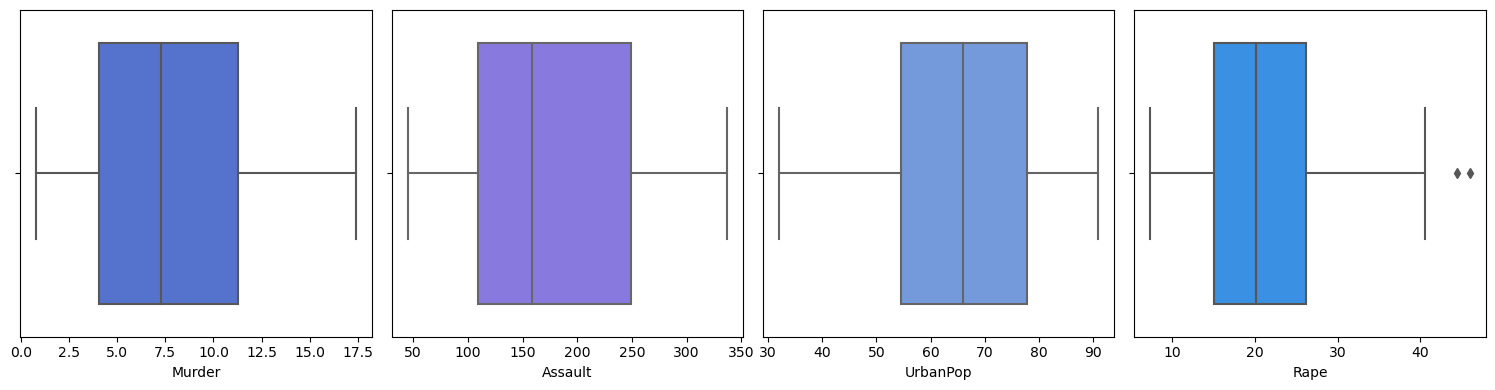

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(15,4))
sns.boxplot(crime.Murder, ax=ax[0],color='RoyalBlue')
sns.boxplot(crime.Assault, ax=ax[1],color='MediumSlateBlue')
sns.boxplot(crime.UrbanPop, ax=ax[2],color='CornflowerBlue')
sns.boxplot(crime.Rape, ax=ax[3],color='DodgerBlue')
plt.tight_layout()
plt.show()

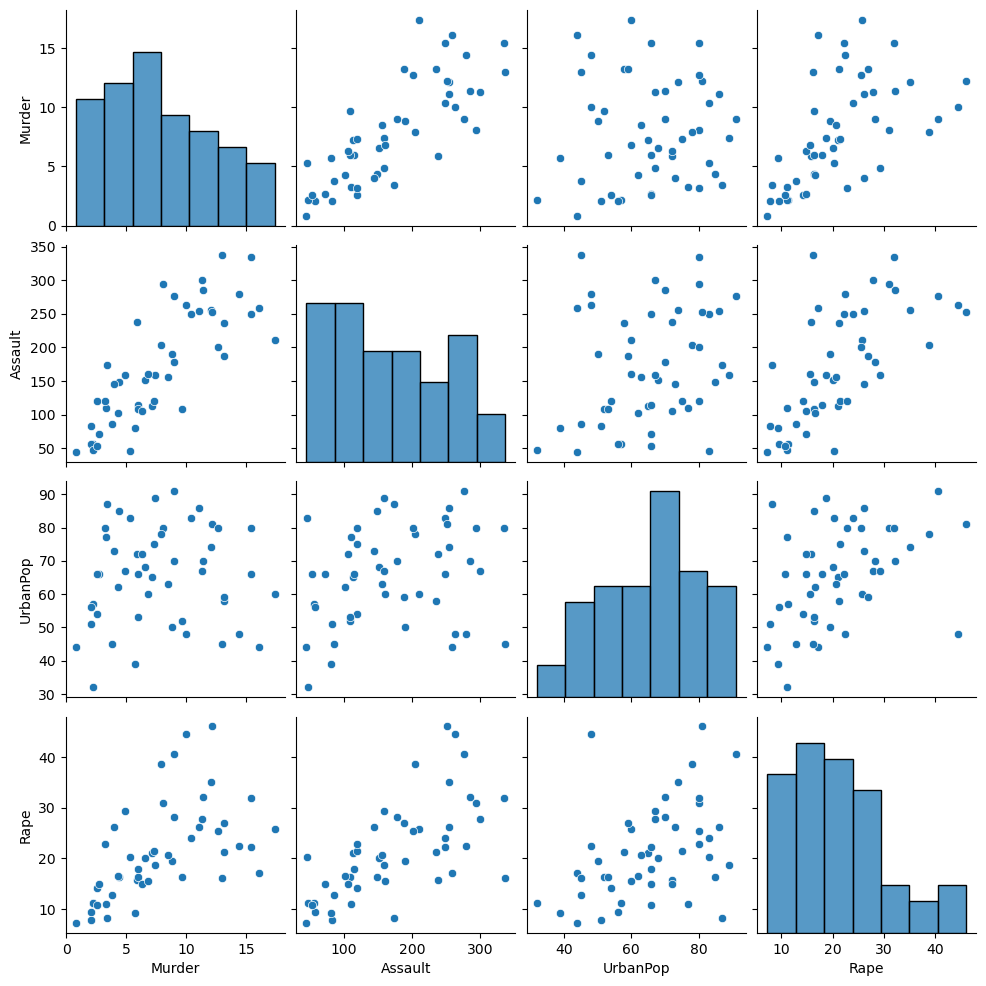

In [10]:
sns.pairplot(crime)

Unique points in this correlation matrix:

1.Assault is positively correlated with Murder

2.Assualt is positively correlated with Rape

3.Rape is positively correlated with Murder

<AxesSubplot:xlabel='Rape', ylabel='Density'>

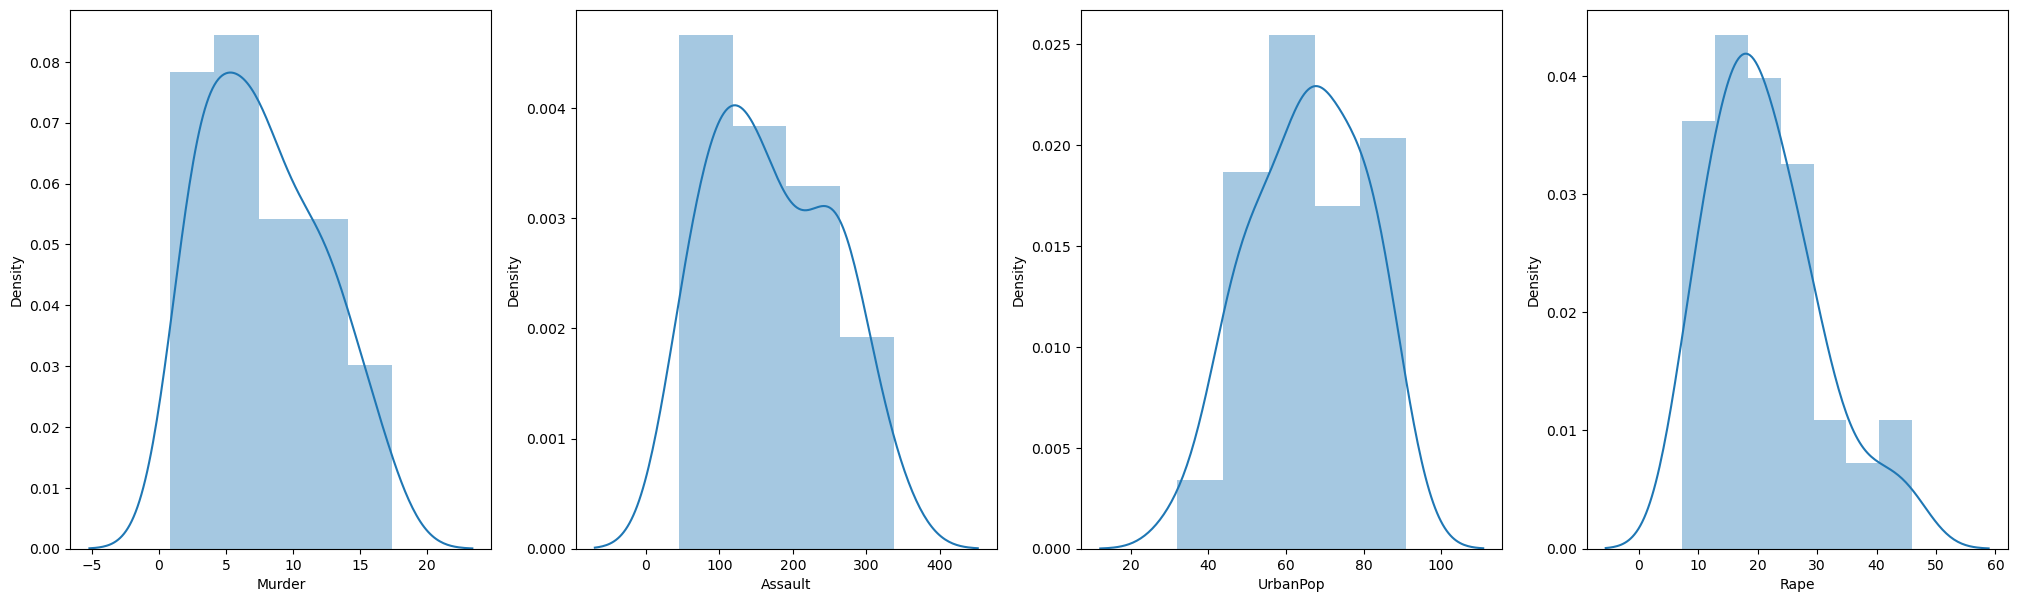

In [11]:
fig,ax=plt.subplots(1,4,figsize=(25,7))
sns.distplot(crime.Murder,ax=ax[0])
sns.distplot(crime.Assault,ax=ax[1])
sns.distplot(crime.UrbanPop,ax=ax[2])
sns.distplot(crime.Rape,ax=ax[3])

Applying normalization on data because different features have different range

In [12]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [13]:
df1 = norm_func(crime.iloc[:,1:])

Normalized crime data

In [14]:
df1.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


# <span style='color:indigo'>Hierarchical clustering


In [15]:
crime = pd.read_csv("crime_data.csv")
crime.rename(columns={"Unnamed: 0":"state"},inplace=True)

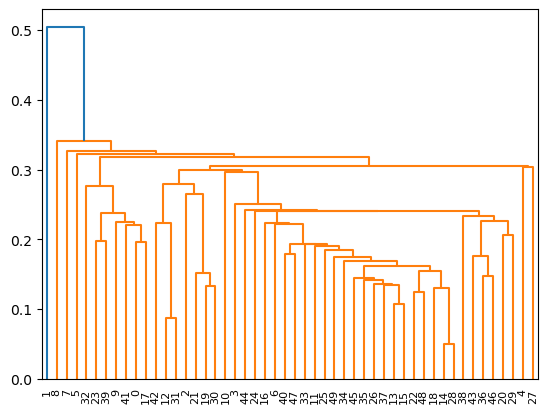

In [16]:
dendrogram = sch.dendrogram(sch.linkage(df1, method='single'))

In [17]:
hc= AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='single')

In [18]:
hc1=hc.fit_predict(df1)
clusters=pd.DataFrame(hc1)

In [19]:
crime['clusters'] = hc1

In [20]:
for i in range(2):
    print("clusters", i)
    print(' | '.join(list(crime[crime['clusters'] == i]['state'].values)))
    #print( len(list(crime[crime['cluster'] == i]['state'].values))) #for total member in each clusters
    print()

clusters 0
Alabama | Arizona | Arkansas | California | Colorado | Connecticut | Delaware | Florida | Georgia | Hawaii | Idaho | Illinois | Indiana | Iowa | Kansas | Kentucky | Louisiana | Maine | Maryland | Massachusetts | Michigan | Minnesota | Mississippi | Missouri | Montana | Nebraska | Nevada | New Hampshire | New Jersey | New Mexico | New York | North Carolina | North Dakota | Ohio | Oklahoma | Oregon | Pennsylvania | Rhode Island | South Carolina | South Dakota | Tennessee | Texas | Utah | Vermont | Virginia | Washington | West Virginia | Wisconsin | Wyoming

clusters 1
Alaska



<span style='color:royalblue'>From the above result, it is evident that, this method is not giving proper result. So, we will try a different method for identify best number of clusters.

### <span style='color:indigo'>Hierarchial clustering with average linkage

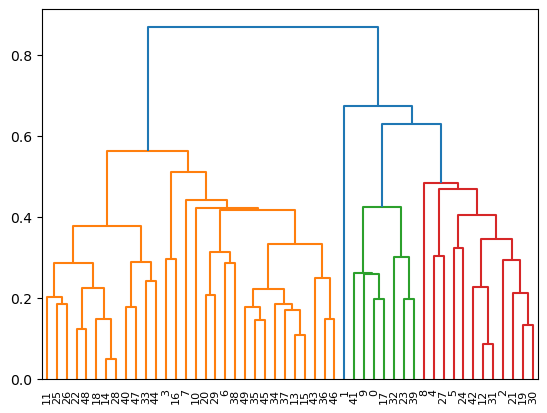

In [21]:
dendrogram = sch.dendrogram(sch.linkage(df1,method='average'))

In [22]:
hc= AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')

In [23]:
hc2=hc.fit_predict(df1)
clusters=pd.DataFrame(hc2)

In [24]:
crime['clusters2'] = hc2

In [25]:
crime.head()

,state,Murder,Assault,UrbanPop,Rape,clusters,clusters2
0,Alabama,13.2,236,58,21.2,0,3
1,Alaska,10.0,263,48,44.5,1,2
2,Arizona,8.1,294,80,31.0,0,1
3,Arkansas,8.8,190,50,19.5,0,0
4,California,9.0,276,91,40.6,0,1


In [26]:
for i in range(4):
    print("cluster", i)
    print(' | '.join(list(crime[crime['clusters2'] == i]['state'].values)))
    print()

cluster 0
Arkansas | Connecticut | Delaware | Hawaii | Idaho | Indiana | Iowa | Kansas | Kentucky | Maine | Massachusetts | Minnesota | Montana | Nebraska | New Hampshire | New Jersey | North Dakota | Ohio | Oklahoma | Oregon | Pennsylvania | Rhode Island | South Dakota | Utah | Vermont | Virginia | Washington | West Virginia | Wisconsin | Wyoming

cluster 1
Arizona | California | Colorado | Florida | Illinois | Maryland | Michigan | Missouri | Nevada | New Mexico | New York | Texas

cluster 2
Alaska

cluster 3
Alabama | Georgia | Louisiana | Mississippi | North Carolina | South Carolina | Tennessee



### <span style='color:indigo'>Hierarchial clustering with complete linkage

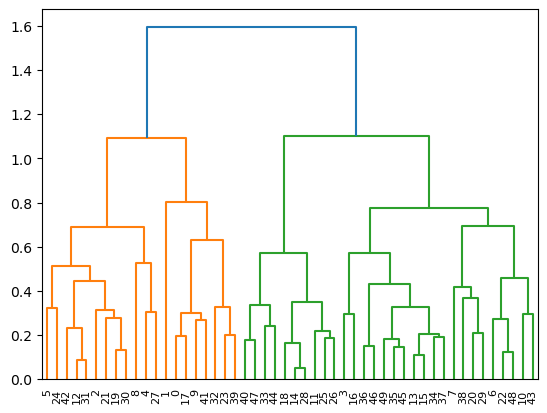

In [27]:
dendrogram = sch.dendrogram(sch.linkage(df1,method='complete'))

In [28]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')

In [29]:
hc3=hc.fit_predict(df1)
clusters=pd.DataFrame(hc3)

In [30]:
crime['clusters3'] = hc3

In [31]:
crime.head()

,state,Murder,Assault,UrbanPop,Rape,clusters,clusters2,clusters3
0,Alabama,13.2,236,58,21.2,0,3,0
1,Alaska,10.0,263,48,44.5,1,2,0
2,Arizona,8.1,294,80,31.0,0,1,0
3,Arkansas,8.8,190,50,19.5,0,0,1
4,California,9.0,276,91,40.6,0,1,0


In [32]:
for i in range(3):
    print("cluster", i)
    print(' | '.join(list(crime[crime['clusters3'] == i]['state'].values)))
    print()

cluster 0
Alabama | Alaska | Arizona | California | Colorado | Florida | Georgia | Illinois | Louisiana | Maryland | Michigan | Mississippi | Missouri | Nevada | New Mexico | New York | North Carolina | South Carolina | Tennessee | Texas

cluster 1
Arkansas | Connecticut | Delaware | Hawaii | Indiana | Kansas | Kentucky | Massachusetts | Minnesota | New Jersey | Ohio | Oklahoma | Oregon | Pennsylvania | Rhode Island | Utah | Virginia | Washington | Wisconsin | Wyoming

cluster 2
Idaho | Iowa | Maine | Montana | Nebraska | New Hampshire | North Dakota | South Dakota | Vermont | West Virginia



### <span style='color:indigo'>Hierarchial clustering with Ward(centroid) linkage

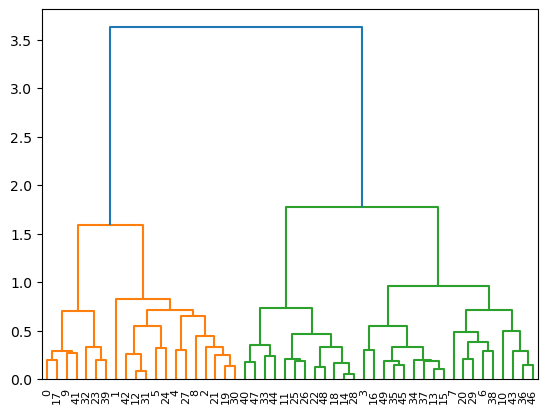

In [33]:
dendrogram = sch.dendrogram(sch.linkage(df1,method='ward'))

In [34]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

In [35]:
hc4=hc.fit_predict(df1)
clusters=pd.DataFrame(hc4)

In [36]:
crime['clusters4'] = hc4

In [37]:
crime.head()

,state,Murder,Assault,UrbanPop,Rape,clusters,clusters2,clusters3,clusters4
0,Alabama,13.2,236,58,21.2,0,3,0,0
1,Alaska,10.0,263,48,44.5,1,2,0,0
2,Arizona,8.1,294,80,31.0,0,1,0,0
3,Arkansas,8.8,190,50,19.5,0,0,1,1
4,California,9.0,276,91,40.6,0,1,0,0


In [38]:
for i in range(3):
    print("cluster", i)
    print(' | '.join(list(crime[crime['clusters4'] == i]['state'].values)))
    print()

cluster 0
Alabama | Alaska | Arizona | California | Colorado | Florida | Georgia | Illinois | Louisiana | Maryland | Michigan | Mississippi | Missouri | Nevada | New Mexico | New York | North Carolina | South Carolina | Tennessee | Texas

cluster 1
Arkansas | Connecticut | Delaware | Hawaii | Indiana | Kansas | Kentucky | Massachusetts | New Jersey | Ohio | Oklahoma | Oregon | Pennsylvania | Rhode Island | Utah | Virginia | Washington | Wyoming

cluster 2
Idaho | Iowa | Maine | Minnesota | Montana | Nebraska | New Hampshire | North Dakota | South Dakota | Vermont | West Virginia | Wisconsin



## K means clustering

### <span style='color:indigo'>Plotting elbow curve to determine the best number of clusters to be used in KMeans

In [39]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state=0)
    km.fit(df1)
    wcss.append(km.inertia_)

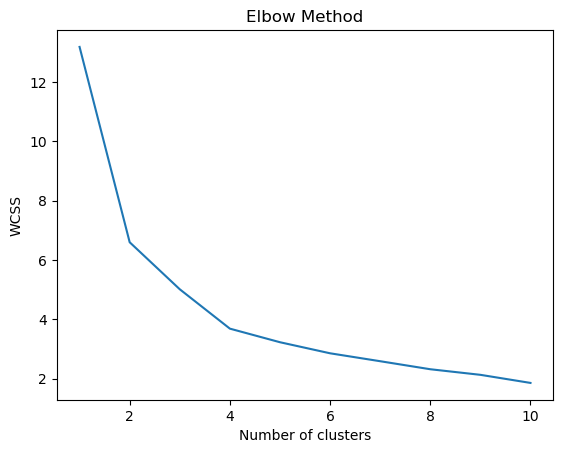

In [40]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Creating a Kmeans cluster with 4 groups

In [41]:
k4 = KMeans(4, random_state=42)
k4.fit(df1)

KMeans(n_clusters=4, random_state=42)

In [42]:
crime['cluster_k'] = k4.labels_

In [43]:
k4.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951]])

In [44]:
for i in range(4):
    print("cluster", i)
    print(' | '.join(list(crime[crime['cluster_k'] == i]['state'].values)))
    print()

cluster 0
Idaho | Iowa | Kentucky | Maine | Minnesota | Montana | Nebraska | New Hampshire | North Dakota | South Dakota | Vermont | West Virginia | Wisconsin

cluster 1
Alaska | Arizona | California | Colorado | Florida | Illinois | Maryland | Michigan | Nevada | New Mexico | New York | Texas

cluster 2
Alabama | Arkansas | Georgia | Louisiana | Mississippi | North Carolina | South Carolina | Tennessee

cluster 3
Connecticut | Delaware | Hawaii | Indiana | Kansas | Massachusetts | Missouri | New Jersey | Ohio | Oklahoma | Oregon | Pennsylvania | Rhode Island | Utah | Virginia | Washington | Wyoming



## DBSCAN Clustering

### <span style='color:indigo'> Applying DBSCAN Clustering Technique

In [45]:
from sklearn.cluster import DBSCAN
dbscan= DBSCAN(eps=0.3,min_samples=3)
dbscan.fit(df1)

DBSCAN(eps=0.3, min_samples=3)

In [46]:
dbscan.labels_

array([ 0, -1,  1,  1, -1, -1,  1, -1, -1,  0,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1])

In [47]:
db=pd.DataFrame(dbscan.labels_,columns=['cluster_DB'])
db.head()

,cluster_DB
0,0
1,-1
2,1
3,1
4,-1


In [48]:
crime['cluster_DB'] = db.cluster_DB

In [49]:
crime.head()

,state,Murder,Assault,UrbanPop,Rape,clusters,clusters2,clusters3,clusters4,cluster_k,cluster_DB
0,Alabama,13.2,236,58,21.2,0,3,0,0,2,0
1,Alaska,10.0,263,48,44.5,1,2,0,0,1,-1
2,Arizona,8.1,294,80,31.0,0,1,0,0,1,1
3,Arkansas,8.8,190,50,19.5,0,0,1,1,2,1
4,California,9.0,276,91,40.6,0,1,0,0,1,-1


## Silhouette score

In [50]:
s1=(metrics.silhouette_score(df1,hc1))
s1

0.21033337025958493

In [51]:
s2=(metrics.silhouette_score(df1,hc2))
s2

0.36992391140277175

In [52]:
s3=(metrics.silhouette_score(df1,hc3))
s3

0.30877213909512063

In [53]:
s4=(metrics.silhouette_score(df1,hc4))
s4

0.3191691542812128

In [54]:
s5=(metrics.silhouette_score(df1,k4.labels_))
s5

0.3408903560074363

In [55]:
s6=(metrics.silhouette_score(df1,db.cluster_DB))
s6

0.24738588099272632

In [57]:
T={'Model':['Single','Average','Complete','Ward','Kmeans','DBScan'],
  'Sillhouette score':[s1,s2,s3,s4,s5,s6]
  }
T=pd.DataFrame(T)
T

,Model,Sillhouette score
0,Single,0.210333
1,Average,0.369924
2,Complete,0.308772
3,Ward,0.319169
4,Kmeans,0.340890
5,DBScan,0.247386


### Visualization (k-means)

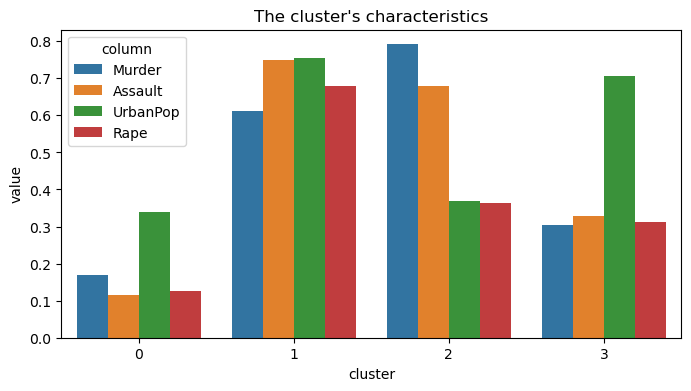

In [58]:
visualize = pd.DataFrame(k4.cluster_centers_)
visualize = visualize.T
visualize['column'] = ['Murder','Assault','UrbanPop','Rape']
visualize = visualize.melt(id_vars=['column'], var_name='cluster')
visualize['cluster'] = visualize.cluster.astype('category')
plt.figure(figsize=(8,4))
sns.barplot(x='cluster', y='value', hue='column', data=visualize)
plt.title('The cluster\'s characteristics')
plt.show()


Cluster1 has high crime & high popultion rate with the kmeans clustering method

Cluster0 has low crime & low popultion rate with the kmeans clustering method

Cluster2 has high murder, assault & low popultion rate with the kmeans clustering method

Cluster3 has low crime & high popultion rate with the kmeans clustering method


### Inference:

### All clusters are good to classify the crime rate states.From different models and visualizations, it is evident that the hiererachial clustering with average linkage method have the highest silhouette score.Higher the silhouette score, more far are the clusters seperated from each other